Get the data or create random dataset

In [2]:
from ctrl import utils

# data = utils.generate_random_dataset(10, 50)
data = utils.load_data()

Determine which connections in A significantly differ from zero. Plot significant connections >0 in black and <0 in red.

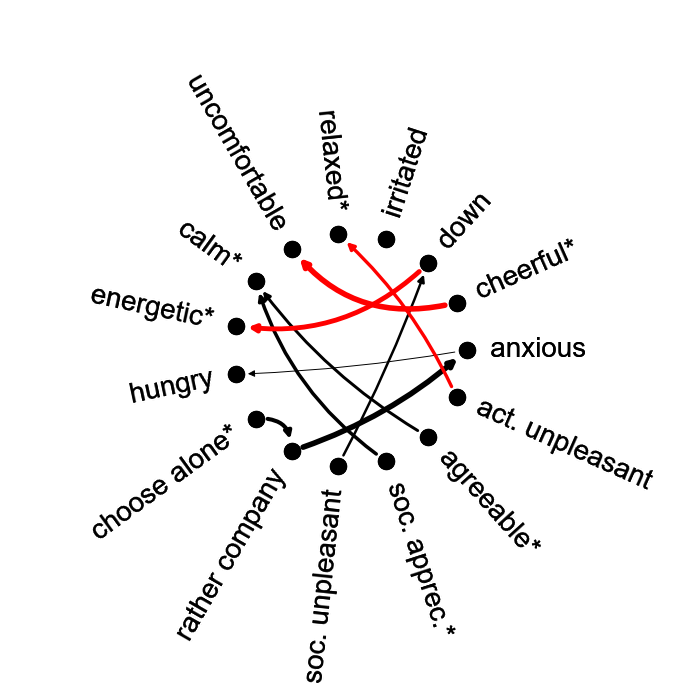

In [5]:
from scipy import stats
import matplotlib.pyplot as plt
from ctrl import utils
import numpy as np
from custom_rcparams_paper import colors


features = data[0]['Xlabs']
A_matrices = np.zeros((len(data), len(features), len(features)))

for j in range(len(data)):
    A = data[j]['A']
    A_matrices[j] = A
sig_adj = stats.ttest_1samp(A_matrices, 0, axis=0).pvalue   # Show only connections with a weight significantly different from 0

fig, ax = plt.subplots(figsize=(7,7))
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
A_mean = A_matrices.mean(axis=0)
for i in range(A_mean.shape[0]):
    A_mean[i,i] = 0                                     # Do not show auto-connections
A_plus = np.where((sig_adj < 0.05) & (A_mean > 0),      # Separate negative from positive connections to display them in different colors
                  A_mean, 0)
A_minus = np.where((sig_adj < 0.05) & (A_mean < 0), 
                  A_mean, 0) * (-1)
utils.plot_circular_graph(A_plus, directed=True, labels=features, 
                          max_edge_width=4, max_edge_rad=-0.6,
                          node_kwargs={'node_size': 150, 'node_color': 'black'},
                          label_kwargs={'font_family': 'sans-serif', 'font_size': 20},
                          ax=ax)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
utils.plot_circular_graph(A_minus, directed=True, labels=features,
                          max_edge_width=4, max_edge_rad=-0.6, 
                          node_kwargs={'node_size': 150, 'node_color': 'black'}, 
                          edge_kwargs={'edge_color': 'r'},
                          label_kwargs={'font_family': 'sans-serif', 'font_size': 20},
                          ax=ax)
plt.savefig('figures/S3.png')

Print the p value of the significant connections

In [4]:
print('Connections with p<0.05:')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if sig_adj[i,j] < 0.05 and i!=j:
            print(f'{features[i]} -> {features[j]}: p={sig_adj[i,j]:0.3f}')

Connections with p<0.05:
anxious -> hungry: p=0.025
cheerful* -> uncomfortable: p=0.027
down -> energetic*: p=0.013
choose alone* -> rather company: p=0.044
rather company -> anxious: p=0.028
soc. unpleasant -> down: p=0.046
soc. apprec.* -> calm*: p=0.046
agreeable* -> calm*: p=0.035
act. unpleasant -> relaxed*: p=0.027
